# Neural word embeddings

"Embedding" can be seen as a fancy way of saying "vector" 

Neural word embedding converts single words into vectors.
Therefore, a document become a **sequence** of vectors. These contain more information than a "bag of words".

Sequences of vectors are used in various models (CNNs, RNNs, Transformers and HMMs), many of which are the state of the art in domains like language translation, question answering, chatbots, TTS, STT, etc.
They take into account the ordering of the words in a sentence.

Two methods:
* Word2vec (NLP technique developed by Google)
* GloVe (learning algorithm developed at Stanford)

## Word2Vec

Uses neural networks. Embeddings are stored in the weights of the neural network.

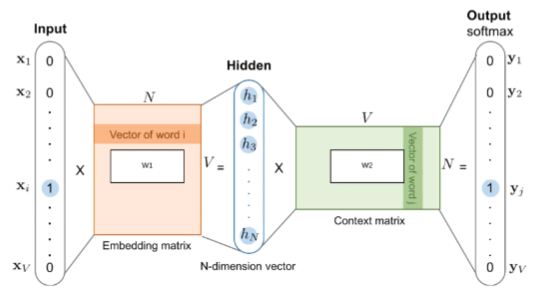

The goal of this neural network is to predict, given an input word, whether another word would be found in its context (i.e. within a small window surrounding the input word).

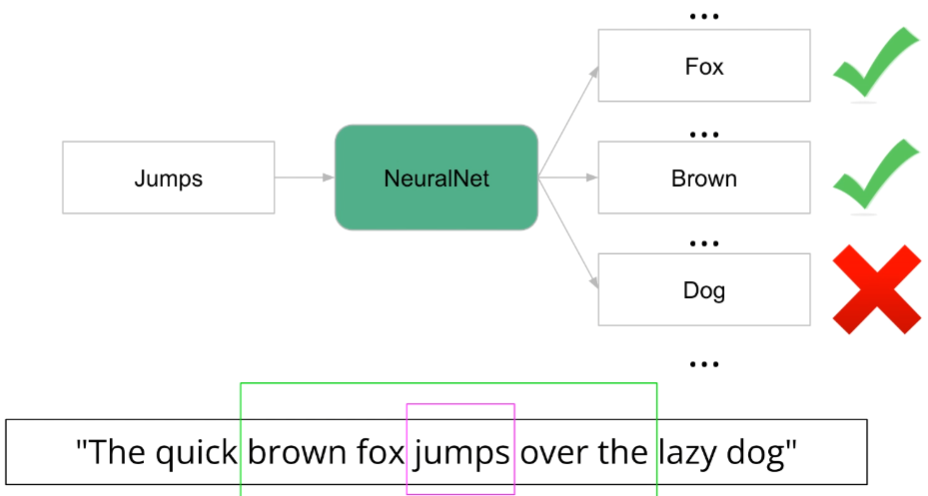

Basically, the neural network is trained to make a binary prediction about whether an input word and some output words can be found close together in the text corpus.

## GloVe

Doesn't use neural networks, but GloVe embeddings can be used for neural networks.

GloVe works like a recommender system. The idea is that if we have 1000 users and 100 movies, we will take the ratings of the users and try to predict which how users will rate movies they haven't yet seen.

GloVe also uses the idea of "context".

Concretely speaking, in "The quick brown fox jumps over the lazy dog", "jumps" is 1 word away from "fox" (score = 1/1), 2 words away from "brown" (score = 1/2), etc., the "ratings" are simply the distance between the words.

## What can we do with word embedding?

We can convert a document into a vector. These vectors won't be sparse as in counting methods or TF-IDF, because they will typically will have a reduced dimensionality. This can be done with the following steps:

1. The document is tokenized into individual words.
2. Use word embeddings to map each of those words to their corresponding word vector.
3. We calculate the average to get a single vector of the same size.

We can also do word analogies by doing arithmetic on the word vectors 

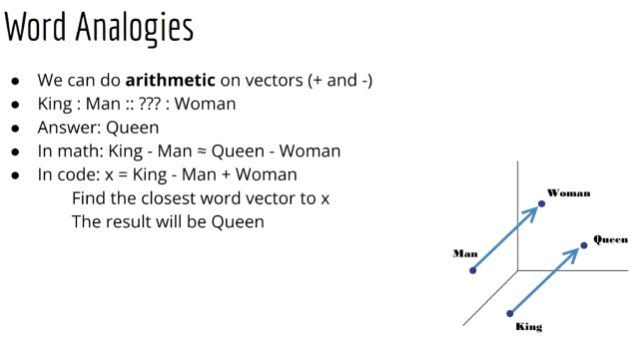

The application might not seem obvious, but by using these vectors in a neural network, we can know that this part of the neural network has close to optimal weights, which might avoid having to train those weights.


In [1]:
# Pre-trained word embeddings

# !!! Careful !!! Very large file (~1.5 G.B.)

# Slower but always guaranteed to work
!wget -nc https://lazyprogrammer.me/course_files/nlp/GoogleNews-vectors-negative300.bin.gz

# You are better off just downloading this from the source
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing
# https://code.google.com/archive/p/word2vec/

--2023-02-15 00:18:14--  https://lazyprogrammer.me/course_files/nlp/GoogleNews-vectors-negative300.bin.gz
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 104.21.23.210, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  2.58MB/s    in 9m 51s  

2023-02-15 00:28:07 (2.66 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [2]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [3]:
from gensim.models import KeyedVectors

ModuleNotFoundError: No module named 'gensim'

In [ ]:
word_vectors = KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin',
    binary=True
)


In [ ]:
def find_analogies(w1, w2, w3):
    # w1 - w2 = ? - w3
    # e.g. king - man = ? - woman
    #      ? = +king +woman -man
    r = word_vectors.most_similar(positive=[w1, w3], negative=[w2])
    print("%s - %s = %s - %s" % (w1, w2, r[0][0], w3))


In [ ]:
find_analogies('king', 'man', 'woman')


In [ ]:
find_analogies('france', 'paris', 'london')


In [ ]:
find_analogies('france', 'paris', 'rome')


In [ ]:
find_analogies('paris', 'france', 'italy')


In [ ]:
find_analogies('france', 'french', 'english')


In [ ]:
find_analogies('japan', 'japanese', 'chinese')


In [ ]:
find_analogies('japan', 'japanese', 'italian')


In [ ]:
find_analogies('december', 'november', 'june')


In [ ]:
find_analogies('miami', 'florida', 'texas')


In [ ]:
find_analogies('einstein', 'scientist', 'painter')


In [ ]:
find_analogies('man', 'woman', 'she')


In [ ]:
find_analogies('man', 'woman', 'aunt')


In [ ]:
find_analogies('man', 'woman', 'sister')


In [ ]:
find_analogies('man', 'woman', 'wife')


In [ ]:
find_analogies('man', 'woman', 'actress')


In [ ]:
find_analogies('man', 'woman', 'mother')


In [ ]:
find_analogies('nephew', 'niece', 'aunt')


In [ ]:
def nearest_neighbors(w):
    r = word_vectors.most_similar(positive=[w])
    print("neighbors of: %s" % w)
    for word, score in r:
        print("\t%s" % word)


In [ ]:
nearest_neighbors('king')


In [ ]:
nearest_neighbors('france')


In [ ]:
nearest_neighbors('japan')


In [ ]:
nearest_neighbors('einstein')


In [ ]:
nearest_neighbors('woman')


In [ ]:
nearest_neighbors('nephew')


In [ ]:
nearest_neighbors('february')
